In [ ]:
!pip install tensorflow
!pip install datasets
!pip install transformers

Python(57784) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(57785) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(57786) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
!pip install tensorflow-addons

Python(57789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization

print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [ ]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_test, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:70%]', 'train[70%:85%]', 'train[85%:]'],
    as_supervised=True,
    with_info=True,
)

# Applying transformations and batching
train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(256, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 48, 48, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 12, 12, 64)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    epochs= 15,
                    validation_data = val_ds,)

Epoch 1/15
603/603 [==============================] - 137s 226ms/step - loss: 0.3701 - accuracy: 0.7957 - val_loss: 0.1636 - val_accuracy: 0.9475
Epoch 2/15
603/603 [==============================] - 153s 253ms/step - loss: 0.1558 - accuracy: 0.9536 - val_loss: 0.1479 - val_accuracy: 0.9543
Epoch 3/15
603/603 [==============================] - 136s 225ms/step - loss: 0.1465 - accuracy: 0.9556 - val_loss: 0.1459 - val_accuracy: 0.9567
Epoch 4/15
603/603 [==============================] - 208s 345ms/step - loss: 0.1404 - accuracy: 0.9585 - val_loss: 0.1402 - val_accuracy: 0.9562
Epoch 5/15
603/603 [==============================] - 137s 228ms/step - loss: 0.1334 - accuracy: 0.9570 - val_loss: 0.1372 - val_accuracy: 0.9555
Epoch 6/15
603/603 [==============================] - 147s 243ms/step - loss: 0.1269 - accuracy: 0.9593 - val_loss: 0.1338 - val_accuracy: 0.9538
Epoch 7/15
603/603 [==============================] - 162s 268ms/step - loss: 0.1211 - accuracy: 0.9602 - val_loss: 0.1216 -

In [ ]:
history.history

{'loss': [0.37014612555503845,
  0.1557791829109192,
  0.14649607241153717,
  0.14044290781021118,
  0.13335298001766205,
  0.126924529671669,
  0.12106884270906448,
  0.11892642825841904,
  0.11548630893230438,
  0.11474406719207764,
  0.11213896423578262,
  0.10747493803501129,
  0.10677312314510345,
  0.10261204093694687,
  0.1028796136379242],
 'accuracy': [0.7957078218460083,
  0.9535534977912903,
  0.9556269645690918,
  0.9585298895835876,
  0.9570266008377075,
  0.9592556357383728,
  0.9601886868476868,
  0.9610180854797363,
  0.9628323912620544,
  0.9616401195526123,
  0.96272873878479,
  0.9648022651672363,
  0.9639210104942322,
  0.9652169346809387,
  0.9648540616035461],
 'val_loss': [0.1635671705007553,
  0.14785365760326385,
  0.1458953469991684,
  0.1401599496603012,
  0.13724753260612488,
  0.1338425874710083,
  0.12161743640899658,
  0.1228908896446228,
  0.12075072526931763,
  0.12540152668952942,
  0.11832043528556824,
  0.11740357428789139,
  0.11711599677801132,
  0

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

130/130 [==============================] - 3s 21ms/step - loss: 0.0972 - accuracy: 0.9639


In [ ]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

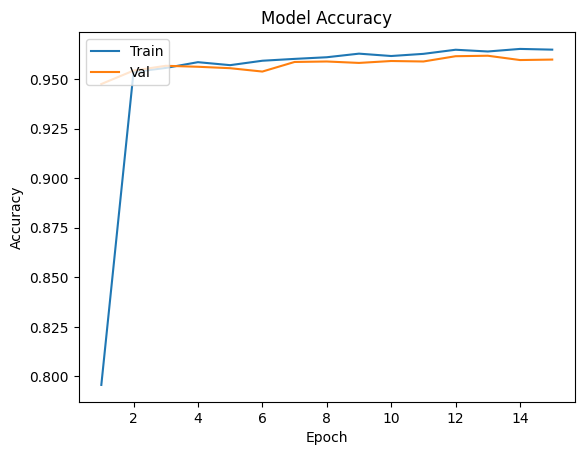

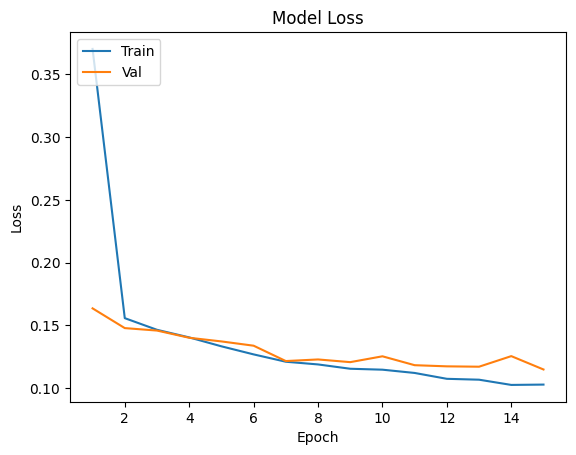

In [ ]:
plot_learningCurve(history, 15)

130/130 [==============================] - 3s 20ms/step


<Figure size 1000x1000 with 0 Axes>

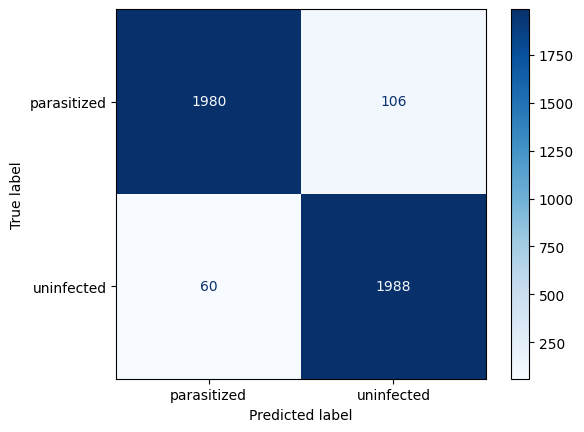

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making predictions with the model
val_images, val_labels = next(iter(val_ds.unbatch().batch(len(ds_validation))))
val_predictions = model.predict(val_images)
val_pred_classes = (val_predictions > 0.5).astype(int)  # Binary classification threshold

# Computing the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

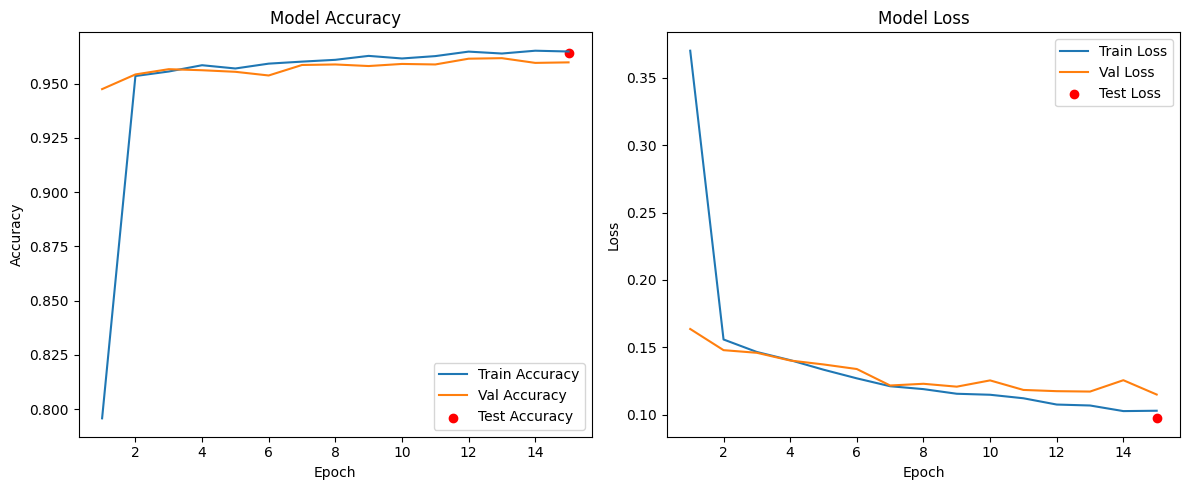

In [ ]:
# Function to plot training, validation, and test results
def plot_results(history, test_loss, test_accuracy, epoch):
    epoch_range = range(1, epoch + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epoch_range, history.history['accuracy'], label='Train Accuracy')
    plt.plot(epoch_range, history.history['val_accuracy'], label='Val Accuracy')
    plt.scatter(len(epoch_range), test_accuracy, color='red', label='Test Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epoch_range, history.history['loss'], label='Train Loss')
    plt.plot(epoch_range, history.history['val_loss'], label='Val Loss')
    plt.scatter(len(epoch_range), test_loss, color='red', label='Test Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the updated plotting function with the number of epochs and test results
plot_results(history, test_loss, test_accuracy, 15)

130/130 [==============================] - 3s 19ms/step


<Figure size 1000x1000 with 0 Axes>

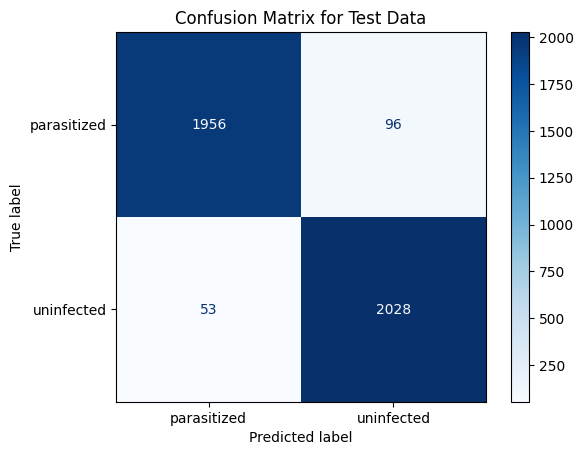

In [ ]:
test_images, test_labels = next(iter(test_ds.unbatch().batch(len(ds_test))))
test_predictions = model.predict(test_images)
test_pred_classes = (test_predictions > 0.5).astype(int)  # Binary classification threshold

# Compute the confusion matrix
test_cm = confusion_matrix(test_labels, test_pred_classes)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=ds_info.features['label'].names)

# Plotting the confusion matrix for test data
plt.figure(figsize=(10,10))
test_disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
model.save('model_1.keras')